#Udacity Nanodegree - Project 4
####Wrangle and Analyze Data | WeRateDogs Twitter


---
Project Details

The dataset that I will be wrangling (and analyzing and visualizing) tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

---





#Introduction & Questions
Data comes from 3 main sources, (1) .csv file, (2) stored online (Udacity) (3) Twitter API. Of which i will have to gather, access, clean before proceeding to do analysis

---

For the sake of this notebook, i will mainly dive into and investigate the following questions :)

1.   Visualizing the most popular dog breed?
2.   Visualizing the most popular dog names?
3.   Which is the common stage?
4.   Most used Twitter Source?

Tool used: Python & its packages:
  
1. pandas & numpy packages for the data analysis
2. requests, os & json packages for data extraction
3. seaborn & matplotlib packages for doing visualization & graphs
4. tweepy package Twitter API & defining the keys

---



**Import Packages**

In [55]:
# packages for the data analysis
import pandas as pd
import numpy as np

# packages for data extraction
import requests
import os
import json

#packages for doing visualization & graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#package Twitter API & defining the keys
import tweepy

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
api

**Step 1: Gathering Data**

Source: Loading From Downloaded File

In [56]:
# 1.1 twitter_archive_enhanced.csv from github
url = 'https://raw.githubusercontent.com/bakedbry/udacity/main/twitter-archive-enhanced.csv'
twitter_archive = pd.read_csv(url)

Source: Downloading Files From The Internet

In [57]:
# 1.2 twitter_archive_enhanced.tsv download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# 1.3 save tsv to file
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

# 1.4 load tsv into dataframe
image_prediction = pd.read_csv("image_predictions.tsv", sep="\t")
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Source: Tweet JSON API

In [58]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [59]:
 twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})


In [60]:
# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count']) 

In [61]:
twitter_data.head() 

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6945,33596,9401744
1,892177421306343426,5247,29140,9401744
2,891815181378084864,3459,21922,9401744
3,891689557279858688,7164,36668,9401744
4,891327558926688256,7694,35059,9401744


**Final Gathered Data**

*   twitter_archive = .csv file provided by Udacity. This dataset contains "twitter-archive-enhanced.csv" 
*   image_prediction = This dataset will contain information about image predictions. Downloaded from online internet (Udacity).
*   twitter_data = This dataset will contain information like tweet_id, no of retweets and no of favorites etc. from API.




**Step 2: Assessing data**

Enhanced Twitter Archive (twitter_archive)


In [62]:
# Display the archive_df table
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [63]:
#Checking the descriptive statistics 
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [64]:
#Checking datatypes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [65]:
#checking null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [66]:
#Checking for duplicates
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Twitter API Data (twitter_data)

In [67]:
# Display the tweets_info_df  table
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6945,33596,9401744
1,892177421306343426,5247,29140,9401744
2,891815181378084864,3459,21922,9401744
3,891689557279858688,7164,36668,9401744
4,891327558926688256,7694,35059,9401744


In [68]:
#Checking the descriptive statistics 
twitter_data.describe()

,retweet_count,favorite_count,followers_count
count,2325.000000,2325.000000,2.325000e+03
mean,2451.614194,7010.975914,9.401780e+06
std,4148.825640,10886.725634,6.735636e+01
min,1.000000,0.000000,9.401744e+06
25%,493.000000,1219.000000,9.401748e+06
50%,1142.000000,3033.000000,9.401775e+06
75%,2839.000000,8553.000000,9.401799e+06
max,70005.000000,143723.000000,9.402241e+06


In [69]:
#Checking the datatypes
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2325 non-null   object
 1   retweet_count    2325 non-null   int64 
 2   favorite_count   2325 non-null   int64 
 3   followers_count  2325 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [70]:
#Checking missing values
twitter_data.isnull().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

In [71]:
#Checking for duplicates
twitter_data[twitter_data.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,followers_count


Image Prediction Udacity Data (image_prediction)

In [72]:
# Display the image predictions table
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [73]:
#Checking the datatypes
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [74]:
#Checking missing values
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [75]:
#Checking for duplicates
image_prediction[image_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Conclusion

## Quality Issues
The four main data quality dimensions are:

Completeness: missing data?
Validity: does the data make sense?
Accuracy: inaccurate data? (wrong data can still show up as valid)
Consistency: standardization?

**Twitter archive table (twitter_archive)**

*   Keep original ratings (no retweets) that have images
*   Drop columns not needed for our analysis
*   Erroneous datatypes in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo)
*   Missing values in 'name' and dog stages represented as 'None'
*   Error in dog names (e.g a,an,actually) are not a dog's name.
*   Clean numerator as some line items have very high numerator ratings.

**Image prediction table (image_prediction)**
*   Erroneous datatype (tweet_id)
*   Missing images for some rows of data
*   Create new column dog_breed

**Twitter API Data (twitter_data)**
*   Missing data


## Tidiness Issues
Three requirements for tidiness:

Each variable forms a column
Each observation forms a row
Each type of observational unit forms a table

**Twitter archive table (twitter_archive)**

*   The last four columns all relate to the same variable (dogoo, floofer, pupper, puppo)


**Image prediction table (image_prediction)**
*   Image predictions table should be added to twitter archive table.
*   Creating a new dog_breed column using the image prediction data


**Twitter API Data (twitter_data)**
*   twitter api table columns(retweet_count, favorite_count, followers_count) should be added to twitter archive table.


**Step 3: Cleaning data**

In [76]:
# Make a copy of all the tables before proceeding to do cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_prediction.copy()
tweet_json_clean = twitter_data.copy()

Define:
Fix "1. keep original ratings (no retweets) that have images"

Code:

In [77]:
## Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

Test:

In [78]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts())) 

0


Define: # Fix 2. Drop columns not needed for our analysis

Code:

In [79]:
# Fix 2. Drop columns not needed for our analysis
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Test:

In [80]:
twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


Define: # 3. Erroneous datatype fix

Code:

In [81]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

# convert timestamp to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# convert source to category datatype
twitter_archive_clean.source = twitter_archive_clean.source.astype("category")


Test:

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 189.2+ KB


In [83]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [84]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2325 non-null   object
 1   retweet_count    2325 non-null   int64 
 2   favorite_count   2325 non-null   int64 
 3   followers_count  2325 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


Define: Fix # 4. Incorrect dog names

Code:

In [85]:
# 4. Incorrect dog names
twitter_archive_clean.name.unique() 
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')
twitter_archive_clean.name.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

Test:

In [86]:
twitter_archive_clean.name.value_counts() 

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

Define: # 5. Missing values in 'name' and dog stages represented as 'None

Code:

In [87]:
# 5. Missing values in 'name' and dog stages represented as 'None
twitter_archive_clean['add_all'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo 
twitter_archive_clean.add_all.value_counts() 

# create function to check dog stages
def check_stages(archive):
    if archive['add_all'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['add_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['add_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['add_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['add_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

twitter_archive_clean['dog_stage'] = twitter_archive_clean.apply(check_stages, axis=1)

Test:

In [88]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  add_all             2175 non-null   object             
 12  dog_stage           2175 non-null 

Define: # 6. Creating a new dog_breed column using the image prediction data

Code:

In [89]:
# 6. Creating a new dog_breed column using the image prediction data
# creation list dog_type and confidence_level in order to use in the function image
dog_breed = []
confidence_level = []

def image(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        dog_breed.append(image_predictions_clean['p1'])
        confidence_level.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        dog_breed.append(image_predictions_clean['p2'])
        confidence_level.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        dog_breed.append(image_predictions_clean['p3'])
        confidence_level.append(image_predictions_clean['p3_conf'])
    else:
        dog_breed.append('Error')
        confidence_level.append('Error')

image_predictions_clean.apply(image, axis=1)

#create new columns
image_predictions_clean['dog_breed'] = dog_breed
image_predictions_clean['confidence_level'] = confidence_level

Test:

In [90]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


Define: # 7. drop tweets with no images

Code:

In [91]:
# 7. drop tweets with no images
twitter_archive_clean.dropna(axis = 0, inplace=True)

Test:

In [92]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  add_all             2175 non-null   object             
 12  dog_stage           2175 non-null 

Define: # 8. Clean Numerator. As some line items have very high numerator ratings.

Code:

In [93]:
# 8. Clean Numerator. As some line items have very high numerator ratings.
# select row with rating_numerator >= 15
numerator = twitter_archive_clean[twitter_archive_clean['rating_numerator'] >= 15]
# delect row selected with rating_numerator >= 15
twitter_archive_clean = twitter_archive_clean.drop(numerator.index, axis=0)

Test:

In [94]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] >= 15].count()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
add_all               0
dog_stage             0
dtype: int64

Define: # 9. Move twitter api table and image prediction table to twitter archive table.

Code:

In [95]:
# 9. Move twitter api table and image prediction table to twitter archive table.
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_json_clean, how='left', on='tweet_id')
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=image_predictions_clean, how='left', on='tweet_id')

Test:

In [96]:
# test result
twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2149 non-null   object             
 1   timestamp           2149 non-null   datetime64[ns, UTC]
 2   source              2149 non-null   category           
 3   text                2149 non-null   object             
 4   rating_numerator    2149 non-null   int64              
 5   rating_denominator  2149 non-null   int64              
 6   name                2149 non-null   object             
 7   doggo               2149 non-null   object             
 8   floofer             2149 non-null   object             
 9   pupper              2149 non-null   object             
 10  puppo               2149 non-null   object             
 11  add_all             2149 non-null   object             
 12  dog_stage           2149 non-null 

Step 4: Storing Data

In [97]:
# Save cleaned data
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False) 

Step 5: Analyzing and Visualizing Data


**Analysis**

For this section, i will look into at least three (3) insights and one (1) visualization.

Here are the questions that i will be doing a deep dive into:

*   Visualizing the most popular dog breed?
*   Visualizing the most popular dog names?
*   Which is the common stage?
*   Most used Twitter Source?

**Question 1: Visualising the most popular dog breed**

In [98]:
twitter_archive_clean['dog_breed'].value_counts()

#The most popular dog breed is a golden retriever, with a labrador retriever coming in as the second most popular breed.

Error                 305
golden_retriever      155
Labrador_retriever    105
Pembroke               95
Chihuahua              91
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_breed, Length: 113, dtype: int64

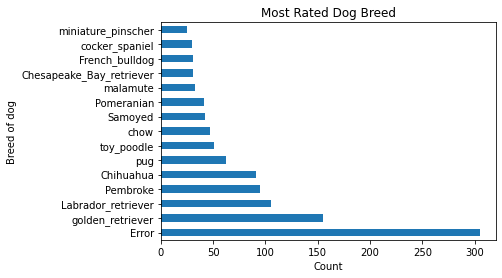

In [99]:
# Histogram to visualize dog breeds
dog_breed = twitter_archive_clean.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

**Question 2: Visualizing the most popular dog names**

In [100]:
twitter_archive_clean.name.value_counts()
#The most popular dog name is Lucy, followed by Charlie 

None          763
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shiloh          1
Gustav          1
Arlen           1
Lenox           1
Christoper      1
Name: name, Length: 929, dtype: int64

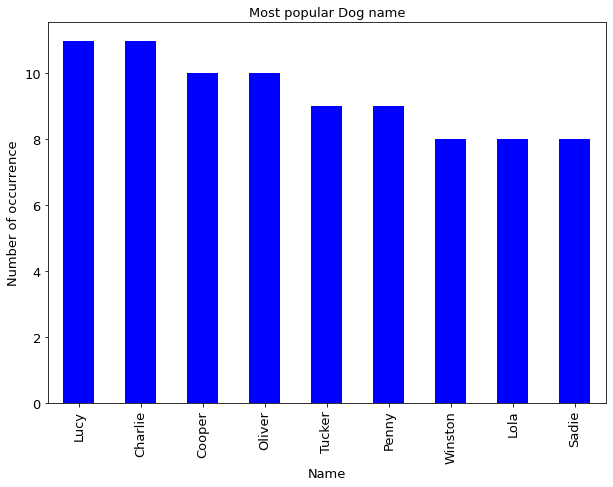

In [101]:
name = twitter_archive_clean.name.value_counts()[1:10] 

#plot
g_bar = name.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

**Question 3: Which is the common stage?**

In [102]:
twitter_archive_clean['dog_stage'].value_counts()
#Most dogs are classified in the 'Pupper' stage.

None        1806
Pupper       223
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dog_stage, dtype: int64

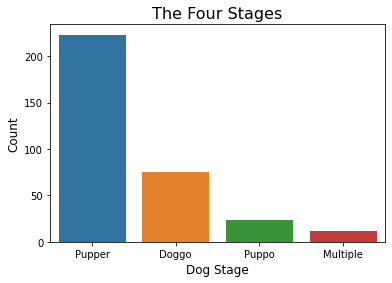

In [103]:
# plot dog_stage
stages_dog = twitter_archive_clean['dog_stage'].value_counts()[1:5].index
sns.countplot(data = twitter_archive_clean, x = 'dog_stage', order = stages_dog)
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('The Four Stages',fontsize=16)
plt.savefig('common-stage.png');

**Question 4: What is the rating distribution?**

In [104]:
twitter_archive_clean['rating_numerator'].value_counts().sort_index(ascending = False)

14     43
13    307
12    500
11    426
10    442
9     156
8      98
7      54
6      32
5      36
4      17
3      19
2       9
1       8
0       2
Name: rating_numerator, dtype: int64

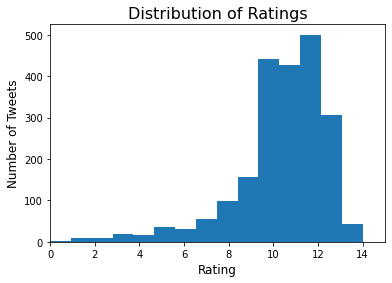

In [105]:
twitter_archive_clean['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)
plt.title('Distribution of Ratings', fontsize = 16)
plt.savefig('Raiting.png');